# Análisis Polínico del matorral espinoso
---


> #### Elaine Grenot Castellano
> ---
> #### Objetivo: Analizar comportamiento del matorral espinoso teniendo en cuenta el componente temporal

In [1]:
# Importando librerías
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
 
plt.style.use('ggplot')

In [3]:
# Cargando datos
df = pd.read_excel("./data/TB4.xlsx")
df.head()

,Profundidad,Abies,Acacia,Agave,Alnus oblongifolia,Anisacanthus type,Arbutus,Berberis,Bursera,Bursera laxiflora,...,Monoleta,Ophioglossum,Osmunda,Reticulate trilete,Selaginella,Pellaea,Spore trilete without perine,Unknown trilete,Indeterminados,Indeterminables
0,5.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.424,0.0,0.0,0.0,4.661,0.000
1,10.0,0.0,0.524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.524,0.0,0.0,0.0,0.000,2.094
2,15.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.124,0.0,0.0,0.0,0.000,5.056
3,18.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000
4,21.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,3.448


## Normalizando de los datos

Como primer paso se normalizaron los datos 

In [4]:
# Indexando datos de acuerdo a la profundidad
df_indexed = df.set_index('Profundidad')

# Normalizando datos
scaler = StandardScaler() 
scaler.fit(df_indexed) 
df_scaled = scaler.transform(df_indexed)

dataframe_scaled = pd.DataFrame(data=df_scaled,
                                index = df_indexed.index,
                                columns=df_indexed.columns) 
dataframe_scaled.head()

,Abies,Acacia,Agave,Alnus oblongifolia,Anisacanthus type,Arbutus,Berberis,Bursera,Bursera laxiflora,Bursera microphylla,...,Monoleta,Ophioglossum,Osmunda,Reticulate trilete,Selaginella,Pellaea,Spore trilete without perine,Unknown trilete,Indeterminados,Indeterminables
Profundidad,,,,,,,,,,,,,,,,,,,,,
5.0,-0.215986,-0.273627,-0.095346,-0.71419,-0.095346,-0.095346,-0.095346,-0.362927,-0.095346,-0.197999,...,-0.196846,-0.294478,-0.095346,-0.527926,1.540799,-0.095346,-0.654797,-0.318175,4.824649,-1.267896
10.0,-0.215986,5.372068,-0.095346,-0.71419,-0.095346,-0.095346,-0.095346,-0.362927,-0.095346,-0.197999,...,-0.196846,-0.294478,-0.095346,-0.527926,1.987326,-0.095346,-0.654797,-0.318175,-0.425086,-0.202281
15.0,-0.215986,-0.273627,-0.095346,-0.71419,-0.095346,-0.095346,-0.095346,-0.362927,-0.095346,-0.197999,...,-0.196846,-0.294478,-0.095346,-0.527926,4.666487,-0.095346,-0.654797,-0.318175,-0.425086,1.305049
18.0,-0.215986,-0.273627,-0.095346,-0.71419,-0.095346,-0.095346,-0.095346,-0.362927,-0.095346,-0.197999,...,-0.196846,-0.294478,-0.095346,-0.527926,-0.352475,-0.095346,-0.654797,-0.318175,-0.425086,-1.267896
21.0,-0.215986,-0.273627,-0.095346,-0.71419,-0.095346,-0.095346,-0.095346,-0.362927,-0.095346,-0.197999,...,-0.196846,-0.294478,-0.095346,-0.527926,-0.352475,-0.095346,-0.654797,-0.318175,-0.425086,0.486755


## Clasificando datos de acuerdo al tipo de polen

In [6]:
# Cargando datos con la clasificación
df_tipo = pd.read_excel("./data/Tabla de tipos funcionales y familias.xlsx")
df_tipo

,Familia,Subfamilia,Genero,Especie,Unnamed: 4
0,Pinaceae,NaN,Abies,NaN,Bosque templado
1,Fabaceae,NaN,Acacia,NaN,Matorral espinoso
2,Asparagaceae,NaN,Agave,NaN,Sin clasificación
3,Betulaceae,NaN,Alnus,oblongifolia,Bosque templado
4,Acanthaceae,NaN,Anisacanthus type,NaN,Matorral espinoso
...,...,...,...,...,...
103,Lygodiaceae,NaN,Lygodium cf.,NaN,Bosque templado
104,Ophioglossaceae,NaN,Ophioglossum,NaN,Bosque templado
105,Osmundaceae,NaN,Osmunda,NaN,Bosque templado
106,Selaginellaceae,NaN,Selaginella,NaN,Bosque templado


In [7]:
def pollen_classification (element, df_tipo):
    '''Función que busca el tipo de polen de un elemento dada la tabla de clasificación'''
    # Checa si el elemento existe en la tabla
    if element in df_tipo.values:
        # Encuentra el número de la fila dónde el elemento está presente
        row_numbers = df_tipo.index[df_tipo.apply(lambda row: element in row.values, axis=1)][0]
        # Clasifica el elemento de acuerdo a la quinta columna de la tabla
        pollen_type = df_tipo.iloc[row_numbers,4]
    else:
        # Si no se encuentra, el tipo será 'Sin clasificación'
        pollen_type = 'Sin clasificación'
        
    return pollen_type


In [8]:
# Transponiendo matriz de datos para incluir la clasificación
df2 = dataframe_scaled.reset_index().T
df2.columns = df2.iloc[0]
df2 = df2.drop('Profundidad')

# Clasificando polen
df2['Tipo'] = df2.index.to_series().apply(lambda element: pollen_classification(element, df_tipo))

# Asignando la columna Tipo como índice
df2.set_index([df2.index,'Tipo'], inplace=True)

# Quedándonos solo con los taxones de tipo matorral espinoso
df_matorral_espinoso = df2[df2.index.get_level_values('Tipo') == 'Matorral espinoso']
df_matorral_espinoso.head()

,Profundidad,5.0,10.0,15.0,18.0,21.0,24.0,27.0,30.0,33.0,36.0,...,310.0,312.5,315.0,317.5,320.0,322.5,325.0,327.5,330.0,331.0
,Tipo,,,,,,,,,,,,,,,,,,,,,
Acacia,Matorral espinoso,-0.273627,5.372068,-0.273627,-0.273627,-0.273627,-0.273627,-0.273627,-0.273627,3.281868,-0.273627,...,-0.273627,-0.273627,-0.273627,-0.273627,-0.273627,-0.273627,-0.273627,-0.273627,-0.273627,-0.273627
Anisacanthus type,Matorral espinoso,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,...,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346
Bursera,Matorral espinoso,-0.362927,-0.362927,-0.362927,-0.362927,-0.362927,-0.362927,-0.362927,-0.362927,-0.362927,2.228319,...,-0.362927,-0.362927,-0.362927,-0.362927,-0.362927,-0.362927,-0.362927,-0.362927,-0.362927,-0.362927
Bursera laxiflora,Matorral espinoso,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,...,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346,-0.095346
Bursera microphylla,Matorral espinoso,-0.197999,-0.197999,-0.197999,-0.197999,-0.197999,-0.197999,-0.197999,-0.197999,-0.197999,-0.197999,...,-0.197999,-0.197999,-0.197999,-0.197999,-0.197999,-0.197999,-0.197999,-0.197999,-0.197999,-0.197999


## Matriz de autocovarianza

Se decidió utilizar la covarianza entre cada taxón con él mismo pero con un desfasaje k correspondiente al índice de profundidad:

$$
\text{cov}(X, X_k) = \frac{{\sum_{i=k+1}^{n}(x_i - \bar{x})(x_{i-k} - \bar{x}_k)}}{{n-1}}
$$

Donde:
- $X$ es el vector del taxón.
- $X_k$ es el vector del taxón desfasado k veces.
- $x_i$ y $x_{i-k}$ son los elementos correspondientes del taxón y el taxón desfasado, respectivamente.
- $\bar{x}$ y $\bar{x}_k$ son las medias de los elementos del taxón y el taxón con desfasaje k.
- $n$ es el número de elementos



$$
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1m} \\
a_{21} & a_{22} & \dots & a_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \dots & a_{nm} \\
\end{bmatrix}
$$
 
 - Se obtiene una matriz de autocovarianza donde cada columna corresponde al taxón y cada fila corresponde al desfasaje en el nivel de la profundidad $k$
 
 - Cada elemento $a_{ij}$ de la matriz corresponde a la covarianza entre el taxón $i$ con un desfasaje $j$ (correspondiente a la profundidad de índice $j$)
 
 - Cada elemento $j$ de la columna $i$ se puede interpretar como la covarianza del taxón $i$ en la profundidad $j$
 
 - Cada fila $j$  se puede interpretar como la covarianza de los distintos taxones en la profundidad j



>#### Ventaja:
>Se tiene en cuenta el componente temporal

>#### Desventaja:
>Mientras mayor es la profundidad menos confiable va a ser el valor de covarianza ya que la cantidad de elementos de los vectores de los taxones disminuye

In [9]:
# Como nuestros datos están estandarizados es lo mismo que si calculamos 
# la correlación a los datos originales
def temporal_covariance(x, y, lag):
    '''Calcula la covarianza entre dos series temporales dado un desfase(lag)'''
    n = len(x)
    # Creando dos nuevos arreglos con el desfase
    x_shifted = x[:n-lag]
    y_shifted = y[lag:]

    # Calcula la covariance
    covariance = np.cov(x_shifted, y_shifted)[0,1]

    return covariance


In [10]:
# Construyendo matriz de autocorrelación/autocovarianza
feature_mtx = df_matorral_espinoso.values

leng_deep = feature_mtx.shape[1]
leng_tax = feature_mtx.shape[0]
AutoCorr = np.zeros([leng_deep-2,leng_tax])
for i in range(leng_tax):
    for j in range(leng_deep-2):
        AutoCorr[j,i] = temporal_covariance(feature_mtx[i], feature_mtx[i], j+1)          


In [11]:
df_AutoCorr= pd.DataFrame(data = AutoCorr, 
                          index = df_matorral_espinoso.columns[0:109],
                          columns = df_matorral_espinoso.index.get_level_values(0))
 
df_AutoCorr.head()

,Acacia,Anisacanthus type,Bursera,Bursera laxiflora,Bursera microphylla,Canotia type,Ceiba,Celtis,Cylindropuntia,Dasylirion,...,Manihot,Marina,Nama,Ranunculaceae,Solanaceae,Sida,Sphaeralcea type,Verbenaceae,Zygophyllaceae,Adiantum
Profundidad,,,,,,,,,,,,,,,,,,,,,
5.0,0.156405,-0.009342,0.349610,-0.009342,-0.040286,0.155769,-0.026905,0.273593,4.567153e-01,-0.017371,...,-0.009342,-0.023930,-0.014467,-0.018495,0.097056,-0.009342,-0.046818,-0.010569,-0.009342,2.176831e-33
10.0,0.283862,-0.009515,0.152472,-0.009515,0.167784,0.430498,0.361464,0.151563,0.000000e+00,-0.017692,...,-0.009515,-0.017413,-0.014043,-0.018838,-0.052229,-0.009515,0.150160,-0.010764,-0.009515,4.365441e-33
15.0,-0.064989,-0.009693,0.161431,-0.009693,-0.041799,0.152260,-0.019782,0.288360,0.000000e+00,-0.018023,...,-0.009693,-0.017738,-0.000609,0.489042,0.048101,0.000000,-0.036702,-0.000672,-0.009693,-5.896586e-33
18.0,0.160378,-0.009876,0.217369,-0.009876,0.036638,0.247131,-0.020155,0.178694,-6.758924e-33,-0.018363,...,-0.009876,-0.018073,-0.000530,-0.019552,0.072763,0.000000,-0.037394,-0.000685,-0.009876,-5.952214e-33
21.0,0.054378,-0.010064,0.128697,-0.010064,-0.043399,-0.012702,-0.007588,0.132726,-2.406495e-33,-0.018713,...,-0.010064,-0.018417,-0.001035,-0.019924,0.038988,0.000000,-0.038106,-0.000698,-0.010064,-2.296442e-33


## Reducción de dimensionalidad: PCA

In [12]:
pca = PCA(n_components=16)
 
pca.fit_transform(AutoCorr)
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

### Analizando componentes

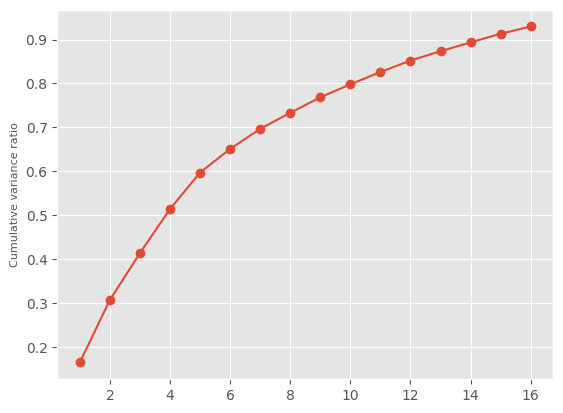

In [13]:
PCA_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PCA_numbers, 
         prop_var.cumsum(), 
         'o-')
plt.ylabel('Cumulative variance ratio', fontsize=8)
plt.show()

In [14]:
prop_var.cumsum()[4]

0.5972672778973718

In [15]:
# Escogemos 5 componentes que representa cerca del 60% de la varianza de los datos
components = 5
pca = PCA(n_components=components)
scores_pca = pca.fit_transform(AutoCorr)

## K-means

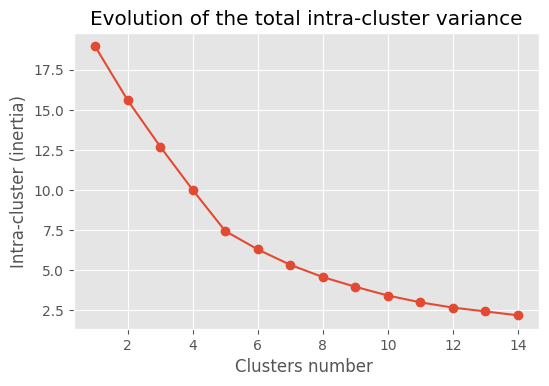

In [16]:
# Escogiendo cantidad de cluster basado en los valores de suma total de varianza intra-cluster (inertia)
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    kmeans_pca = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    kmeans_pca.fit(scores_pca)
    inertias.append(kmeans_pca.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolution of the total intra-cluster variance")
ax.set_xlabel('Clusters number ')
ax.set_ylabel('Intra-cluster (inertia)');

In [17]:
# Escogimos 4 como el número de cluster utilizando el método del codo
n_clusters = 4
kmeans_pca = KMeans(n_clusters = n_clusters, n_init = 20, random_state = 123)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, n_init=20, random_state=123)

## Analizando resultados

In [18]:
# Transponiendo matriz de datos original para incluir la clasificación
df3 = df.T
df3.columns = df3.iloc[0]
df3 = df3.drop('Profundidad')

# Clasificando polen
df3['Tipo'] = df3.index.to_series().apply(lambda element: pollen_classification(element, df_tipo))

# Asignando la columna Tipo como índice
df3.set_index([df3.index,'Tipo'], inplace=True)

# Quedándonos solo con los taxones de tipo matorral espinoso
df_matorral_espinoso_original = df3[df3.index.get_level_values('Tipo') == 'Matorral espinoso']
df_matorral_espinoso_original = df_matorral_espinoso_original.reset_index(level='Tipo')
df_matorral_espinoso_original.drop(columns=df_matorral_espinoso_original.columns[0], inplace = True)
df_matorral_espinoso_original = df_matorral_espinoso_original.T

In [19]:
# Concatenado datos originales con los valores de componentes principales y clusters
df_pca_kmeans = pd.concat([df_matorral_espinoso_original[:109].reset_index(),
                           pd.DataFrame(scores_pca)], axis=1)
df_pca_kmeans.columns.values[-5: ] = ['Componente_1', 'Componente_2', 'Componente_3', 
                                      'Componente_4', 'Componente_5']
df_pca_kmeans['Cluster'] = kmeans_pca.labels_

In [21]:
# Graficando
df_pca_kmeans_ = df_pca_kmeans.melt(id_vars=['Profundidad', 'Cluster',
                                           'Componente_1', 'Componente_2', 'Componente_3', 
                                      'Componente_4', 'Componente_5'])

fig = px.scatter(df_pca_kmeans_, x="Profundidad", y="variable",
                 size="value", color="Cluster",
                 hover_name="variable")
fig.update_layout(xaxis_title="Depth", yaxis_title="", height=800)
fig.show()

In [22]:
fig.write_html("fig_interactive.html")

In [23]:
fig = px.scatter(df_pca_kmeans_, x="Componente_1", y="Componente_2",
                 color="Cluster",
                 hover_name="variable")
fig.update_layout(xaxis_title="Component_1", yaxis_title="Component_2")
fig.show()

### Observaciones
- Para profundidades más alejadas el modelo no es confiable debido a la poca significancia de sus covarianzas
- Los resultados arrojan que para las profundidad 75, 171, 216 y 276 hay cambios para la especie del matorral espinoso
- Es posible que el kmeans no sea el método mas idóneo ya que es sensible a outliers  